In [27]:
import numpy as np

In [28]:
import pandas as pd

In [29]:
import re

In [30]:
alldata= pd.read_csv('allstates.csv', sep=';')

In [31]:
alldata.head()

,position,description,City,State,Unnamed: 4,Unnamed: 5,Unnamed: 6,SQL,Java,Excel,...,Phd,Bachelor,Montecarlo,Matlab,Pandas,Stata,Lookup,PowerBi,Qlik,Looker
0,2018 - Health Research Analyst 2 - New,Are you interested in the opportunity to work ...,Atlanta,GA,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A Vigorously-Charged Scientific Programmer,Job Description\n\nHexagon Lavish® is a scient...,Atlanta,GA,NaN,NaN,NaN,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,Account Executive - Atlanta,Dataiku is looking for an experienced Account ...,Atlanta,GA,NaN,NaN,NaN,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Account Executive - Atlanta,Position: Account Executive - Georgia\nLocatio...,Atlanta,GA,NaN,NaN,NaN,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Account Executive - Healthcare Sales,Account Executive - Healthcare\nAtlanta Based ...,Atlanta,GA,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
alldata=alldata[['position', 'description', 'City', 'State', 'SQL','Java', 'Excel','PHD','Tableau','Azure','C++','UX','Ph.D.','Bachelor','Montecarlo','Matlab', 'Pandas','Stata','Lookup','PowerBi','Qlik','Looker']]

In [33]:
#we want to make all the columns into lower case 
cols = []
for i in range(len(alldata.columns)):
    cols.append(alldata.columns[i].lower())
cols

['position',
 'description',
 'city',
 'state',
 'sql',
 'java',
 'excel',
 'phd',
 'tableau',
 'azure',
 'c++',
 'ux',
 'ph.d.',
 'bachelor',
 'montecarlo',
 'matlab',
 'pandas',
 'stata',
 'lookup',
 'powerbi',
 'qlik',
 'looker']

In [34]:
alldata.columns = cols

In [35]:
alldata.columns

Index(['position', 'description', 'city', 'state', 'sql', 'java', 'excel',
       'phd', 'tableau', 'azure', 'c++', 'ux', 'ph.d.', 'bachelor',
       'montecarlo', 'matlab', 'pandas', 'stata', 'lookup', 'powerbi', 'qlik',
       'looker'],
      dtype='object')

### Focus on California and New York

In [36]:
cany= alldata.query('state=="CA" or state=="NY"')

In [37]:
cany['state'].unique()

array(['CA', 'NY'], dtype=object)

In [38]:
cany.shape

(3084, 22)

In [39]:
cleancany=cany.drop_duplicates()

In [40]:
cleancany.shape

(3062, 22)

### Most wanted positions

In [41]:
cleancany['position'].value_counts()

Data Scientist                                                         223
Senior Data Scientist                                                   58
Research Analyst                                                        38
Data Engineer                                                           38
Machine Learning Engineer                                               34
                                                                      ... 
Data Scientist- Enterprise Product Analytics                             1
Medical Communications Specialist; Bureau of Public Health Training      1
HR Analyst                                                               1
Staff Discharge Chamber Scientist                                        1
VP Data & Insights                                                       1
Name: position, Length: 2275, dtype: int64

In [42]:
cleancany['position'].value_counts('scientist')

Data Scientist                                                         0.072828
Senior Data Scientist                                                  0.018942
Research Analyst                                                       0.012410
Data Engineer                                                          0.012410
Machine Learning Engineer                                              0.011104
                                                                         ...   
Data Scientist- Enterprise Product Analytics                           0.000327
Medical Communications Specialist; Bureau of Public Health Training    0.000327
HR Analyst                                                             0.000327
Staff Discharge Chamber Scientist                                      0.000327
VP Data & Insights                                                     0.000327
Name: position, Length: 2275, dtype: float64

In [43]:
text=cleancany['position']

In [44]:
job_titel = cleancany['position'].unique()
job_titel

array(['Institutional Review Board Analyst I - Office of Research',
       'Analyst - Optimization', 'Postdoctoral Research Associate', ...,
       'Intern Scientist', 'Senior Data & Applied Scientist',
       'Principal Data Scientist; Deep Learning'], dtype=object)

In [45]:
len(job_titel)

2275

### Filter Scientist and Analyst Positions

In [46]:
scientist= cleancany[cleancany['position'].str.contains("Scientist")]

In [47]:
scientist.head()

,position,description,city,state,sql,java,excel,phd,tableau,azure,...,ph.d.,bachelor,montecarlo,matlab,pandas,stata,lookup,powerbi,qlik,looker
2182,Additive Materials and Process Scientist,Position Specification: Additive Material and ...,Los Angeles,CA,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2186,Data Scientist,Data Scientist contract in Los Angeles; CA (Bu...,Los Angeles,CA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2187,Postdoctoral Scientist (Immunology),Dr. Helen Goodridge is looking for a postdocto...,Los Angeles,CA,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2188,Principal Scientist 1,Grifols is a global healthcare company whose m...,Los Angeles,CA,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2189,Project Scientist,The Smidt Heart Institute at Cedars-Sinai; Los...,Los Angeles,CA,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
analyst= cleancany[cleancany['position'].str.contains("Analyst")]

In [49]:
analyst.shape

(406, 22)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
analyst_ca = analyst[analyst['state']=='CA']
analyst_ca.shape

(198, 22)

In [54]:
analyst_ny = analyst[analyst['state']=='NY']
analyst_ny.shape

(208, 22)

In [55]:
scientist_ny = scientist[scientist['state']=='NY']
scientist_ny.shape

(378, 22)

In [56]:
scientist_ca = scientist[scientist['state']=='CA']
scientist_ca.shape

(972, 22)

In [57]:
an = {'Analyst_CA':198, 'Scientist_CA':972,'Analyst_NY':208, 'Scientist_NY':378} 

<BarContainer object of 4 artists>

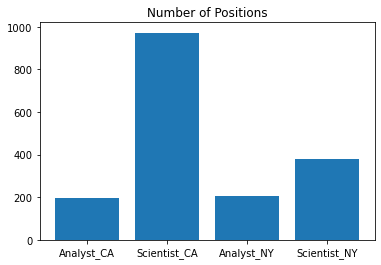

In [58]:
keys = an.keys()
values = an.values()
plt.title('Number of Positions')
plt. bar(keys, values)

In [59]:
skills_ca= {'SQL':sum(scientist_ca['sql']),'Java':sum(scientist_ca['java']),'Excel':sum(scientist_ca['excel']),'Tableau':sum(scientist_ca['tableau'])}
skills_ny={'SQL':sum(scientist_ny['sql']),'Java':sum(scientist_ny['java']),'Excel':sum(scientist_ny['excel']),'Tableau':sum(scientist_ny['tableau'])}

### Most important skills required 

In [63]:
dsda=pd.concat([scientist_ca,scientist_ny,analyst_ca,analyst_ny],axis=0)

In [64]:
skills= {'SQL':sum(dsda['sql']),'Java':sum(dsda['java']),'Tableau':sum(dsda['tableau']),'Pandas':sum(dsda['pandas']),'Stata':sum(dsda['stata']),'Excel':sum(dsda['excel']),'C++':sum(dsda['c++']),'Matlab':sum(dsda['matlab'])}

<BarContainer object of 8 artists>

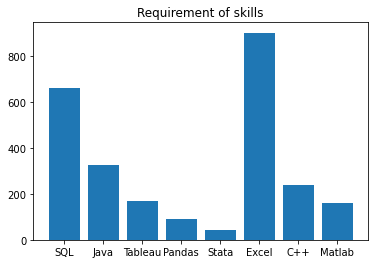

In [65]:
keys = skills.keys()
values = skills.values()
plt.title('Requirement of skills')
plt. bar(keys, values)

### How many Positions require a PHD?

In [78]:
sum(dsda['phd'])+sum(dsda['ph.d.'])

850

In [79]:
dsda.shape

(1756, 22)

In [ ]:
sum(analyst_ny['sql'])

In [ ]:
SQL = {'Analyst_CA':87, 'Scientist_CA':307,'Analyst_NY':73, 'Scientist_NY':194} 

In [ ]:
keys = skills_ca.keys()
values = skills_ca.values()
plt.title('Requirement of SQL skills')
plt. bar(keys, values)